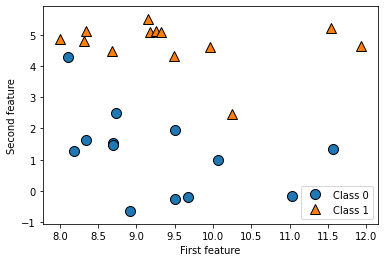

In [1]:
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline

# Makes the simple dataset:
X, y = mglearn.datasets.make_forge()

# Plots the dataset:
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

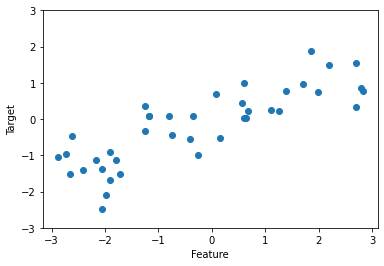

In [2]:
# Load and plot the "wave" dataset:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()

In [3]:
# Load Wisconson breast cancer dataset:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))
print("Cancer data type: {}".format(type(cancer)))
print("Shape of cancer data: {}".format(cancer.data.shape))
# Features in the cancer dataset:
print("Feature names: \n{}".format(cancer.feature_names))

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
Cancer data type: <class 'sklearn.utils.Bunch'>
Shape of cancer data: (569, 30)
Feature names: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [4]:
# Load and look at Boston Housing dataset:
from sklearn.datasets import load_boston
boston = load_boston()
# 506 data points with 13 features each:
print("Data shape: {}".format(boston.data.shape))

Data shape: (506, 13)


In [5]:
# Load derived Boston Housing dataset which includes feature engineering:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


k-Nearest Neighbors

In [6]:
# Show KNN classification for three new data points in the "forge" dataset using a single neighbor

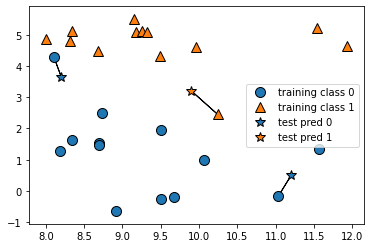

In [7]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

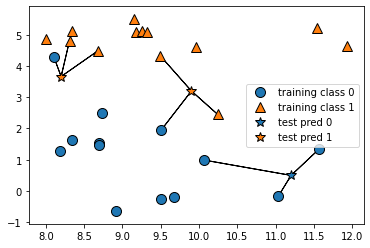

In [8]:
# Now use three nearest neighbors with standard weighting
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [9]:
# Full example using KNN on "forge" dataset

# Split data:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run KNN with three neighbors:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
# check type of clf:
print("Type of clf: {}".format(type(clf)))

# Train the KNeighbors Classifier object using the training set:
clf.fit(X_train, y_train)

# Make predictions on the test set:
print("Test set predictions: {}".format(clf.predict(X_test)))

# Check the accuracy:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Type of clf: <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
Test set predictions: [1 0 1 0 1 0 0]
Test set accuracy: 0.86


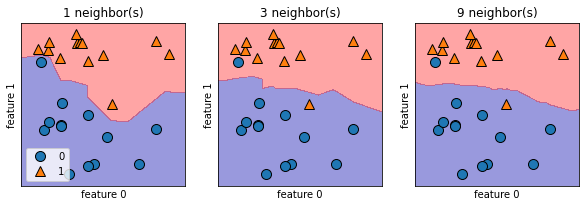

In [10]:
# Decision boundaries for KNN on the "forge" dataset with 1, 3, and 9 neighbors
# Make empty graphs:
fig, axes = plt.subplots(1, 3, figsize=(10,3))
# Fill plots:
for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)
plt.show()

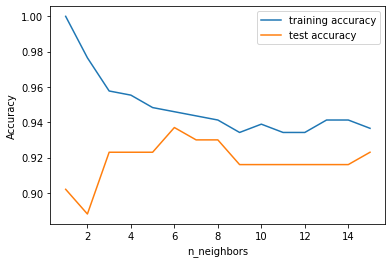

In [11]:
# Test model complexity vs. generalization for the Breast Cancer dataset

# Split data into training and test set:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
# Below: stratify maintains class proportions, random_state ensures splits are reproducable
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try numbers of neighbors from 1 to 15
neighbors_settings = range(1,16)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    # Train:
    clf.fit(X_train, y_train)
    # record training accuracy:
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy:
    test_accuracy.append(clf.score(X_test, y_test))

# Plot training vs test accuracy:
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

K-neighbors regression

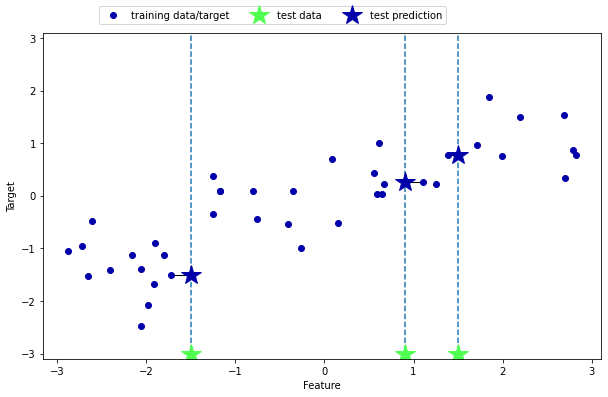

In [12]:
# Test k-neighbors regression on the "wave" dataset with one neighbor
mglearn.plots.plot_knn_regression(n_neighbors=1)

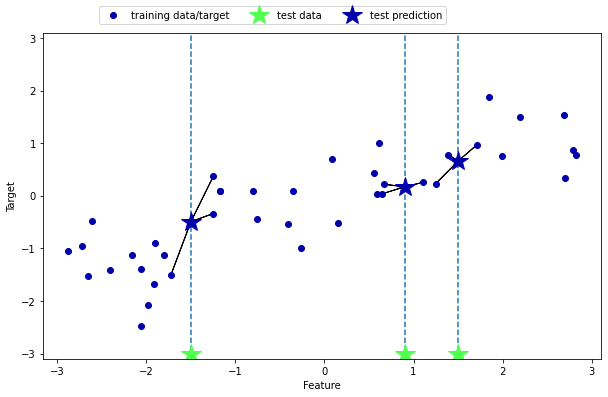

In [13]:
# Test k-neighbors regression on the "wave" dataset with three neighbors
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [14]:
# Full example using K-neighbors regression
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Set the regressor object to have 3 neighbors:
reg = KNeighborsRegressor(n_neighbors=3)
# Train the model:
reg.fit(X_train, y_train)

# Test on the test set:
print("Test set predictions:\n{}".format(reg.predict(X_test)))

# Check R^2 score for regressor:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Test set R^2: 0.83


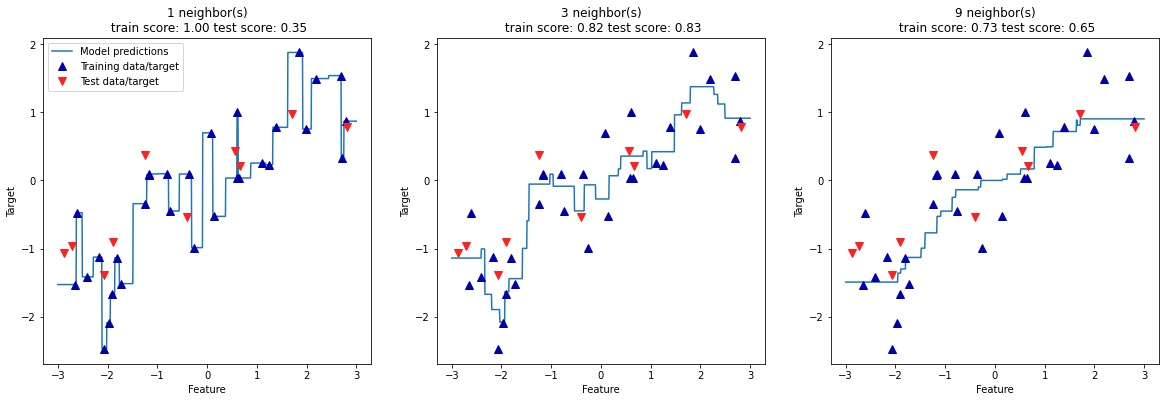

In [15]:
# Analyze K-neighbors regression on "wave" dataset for different numbers of neighbors:
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(20,6))
# create 1000 datapoints
line = np.linspace(-3, 3, 1000).reshape(-1,1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    # change shape and color of training and test data
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors, reg.score(X_train, y_train),reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc="best")
plt.show()

Linear Models

w[0]: 0.393906  b: -0.031804


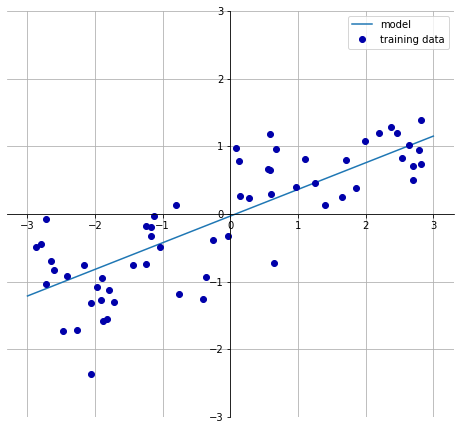

In [16]:
# Example linear regression on the "wave" dataset
mglearn.plots.plot_linear_regression_wave()

In [17]:
# Full example using linear regression (least squares)
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43)

lr = LinearRegression().fit(X_train, y_train)
print("Type of lr: {}".format(type(lr)))
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

# Test performance of the model:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Type of lr: <class 'sklearn.linear_model._base.LinearRegression'>
lr.coef_: [0.3924424]
lr.intercept_: 0.0010089363733005105
Training set score: 0.66
Test set score: 0.63


In [18]:
# Test linear regression on the Boston Housing dataset
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
lr = LinearRegression().fit(X_train, y_train)

# Check R^2 scores on test and training sets
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.94
Test set score: 0.81


For the last example, the training and test R^2 scores revealed likely overfitting. When this happens we need to look at another model like ridge regression.

Ridge regression is just tikhonov regularized parameter estimation for w.

In [19]:
# Example of ridge regression on the Boston Housing dataset
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Type of ridge: {}".format(type(ridge)))

# R^2 scores
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Type of ridge: <class 'sklearn.linear_model._ridge.Ridge'>
Training set score: 0.86
Test set score: 0.84


In [20]:
# Changing the regularization parameter changes the R^2 scores
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.76
Test set score: 0.76
Training set score: 0.91
Test set score: 0.85


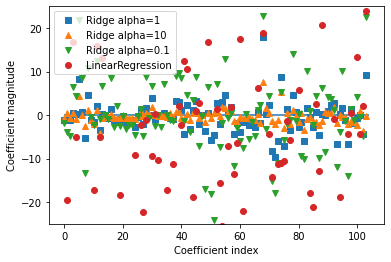

In [21]:
# Increasing the regularization parameter dampens the reconstruction, leading to smaller values of w:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

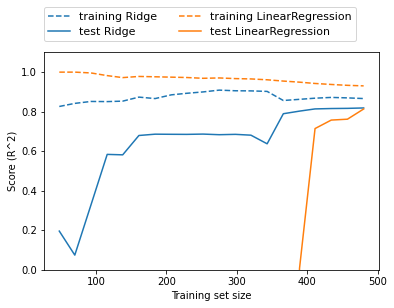

In [22]:
# Examples fixing the regularization parameter but varying the amount of training data
mglearn.plots.plot_ridge_n_samples()

Lasso regularization is just L1 regularization. In L1 regularization some coefficients will become identically zero, leading to automatic feature selection.

In [23]:
# Lasso on the Boston Housing dataset:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Type of lasso: {}".format(type(lasso)))
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

# This is overregularized, as the L1 penalty eliminated 102 features

# Reduce alpha to prevent underfitting

Type of lasso: <class 'sklearn.linear_model._coordinate_descent.Lasso'>
Training set score: 0.21
Test set score: 0.23
Number of features used: 3


In [24]:
lasso002 = Lasso(alpha=0.02, max_iter=10000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso002.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso002.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso002.coef_ != 0)))

Training set score: 0.85
Test set score: 0.82
Number of features used: 28


In [25]:
# Setting alpha too low leads to overfitting
lasso00001 = Lasso(alpha=0.00001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.94
Test set score: 0.83
Number of features used: 102


/home/zieglers/Documents/python/ml_python_muller_guido/.venv/lib64/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 414.1591205561041, tolerance: 3.1418019894459106
  positive)


NameError: name 'lasso001' is not defined

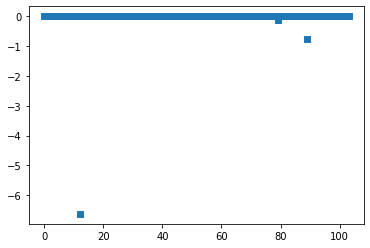

In [26]:
# Plotting coefficients w for different values of the regularization parameter again shows that large alpha leads to smaller w
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

Linear models can also be used for classification.

The two most common linear classifiers are:
    - logistic regression 
        - uses the sigmoid function to give a probability of an input belonging to a certain class
        - this is an extension of linear regression, take z=wX+b and pass it to the sigmoid function as \sigma(z).
    - linear support vector machines
        - looks for a hyperplane which maximizes the distance between each class of data and the plane

/home/zieglers/Documents/python/ml_python_muller_guido/.venv/lib64/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


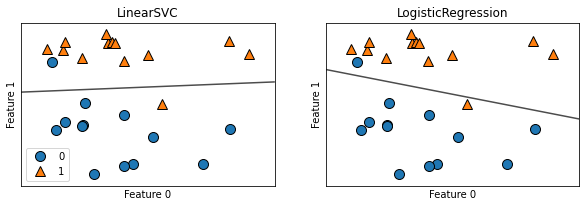

In [34]:
# Visualize decision boundaries from logistic regression and LSVM on the "forge" dataset
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

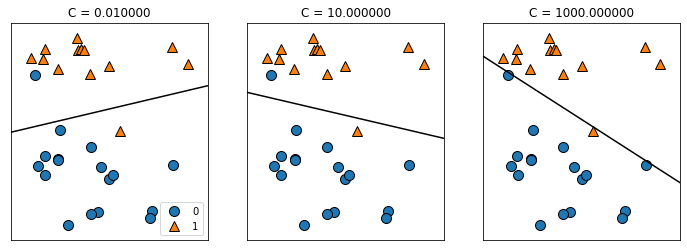

In [35]:
# For these models, the parameter C is just the inverse of the Tikhonov regularization parameter
# Lower C leads to more regularization, leading to a flatter decision boundary and more generalization
# Higher C seeks to fit every single training point.
mglearn.plots.plot_linear_svc_regularization()

In [36]:
# Example looking at logistic regression on the Breast Cancer dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("Type of cancer: {}".format(type(cancer)))
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Type of logreg: {}".format(type(logreg)))
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Type of cancer: <class 'sklearn.utils.Bunch'>
Type of logreg: <class 'sklearn.linear_model._logistic.LogisticRegression'>
Training set score: 0.946
Test set score: 0.958


/home/zieglers/Documents/python/ml_python_muller_guido/.venv/lib64/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [39]:
# Training and test score being so close suggests underfitting, increasing C should help
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.955
Test set score: 0.958
Training set score: 0.934
Test set score: 0.930


/home/zieglers/Documents/python/ml_python_muller_guido/.venv/lib64/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/zieglers/Documents/python/ml_python_muller_guido/.venv/lib64/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for altern

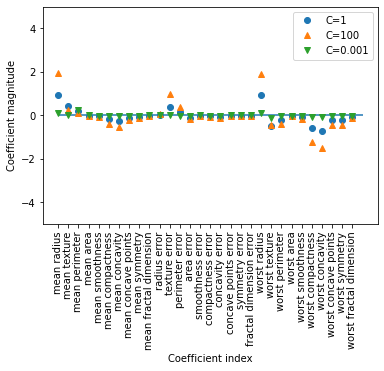

In [40]:
# Show how the coefficients change as the parameter C varies
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

/home/zieglers/Documents/python/ml_python_muller_guido/.venv/lib64/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


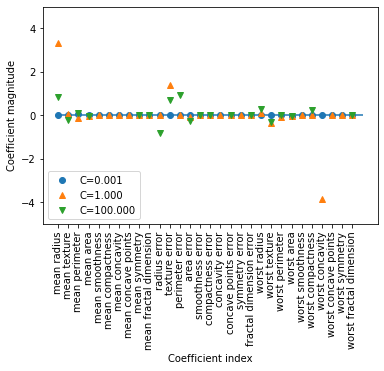

In [43]:
# Use L1 regularization instead:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1", solver="liblinear").fit(X_train, y_train)
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3);

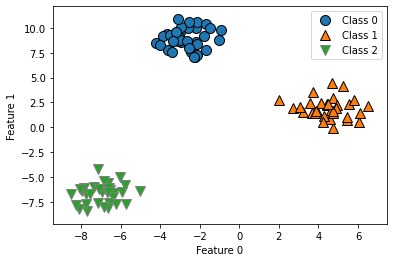

In [44]:
# Test a one-vs-rest method for three-class classification
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"]);

In [46]:
# Train a LSVC on the dataset
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape) # size (3,2), each row holds the coefficient vector for one of the three classes
print("Intercept shape: ", linear_svm.intercept_.shape) # size(3,), one intercept for each class

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


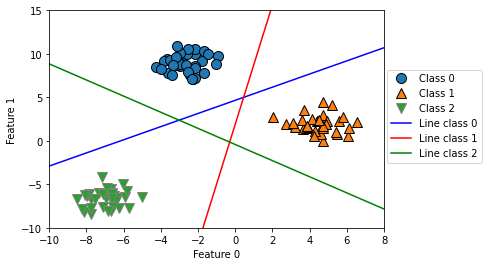

In [47]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3));

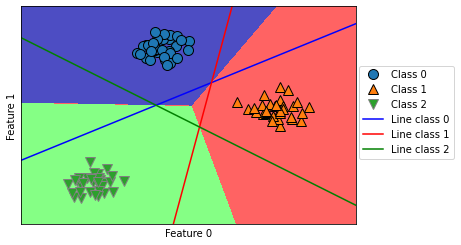

In [50]:
# Show the prediction regions for the previoux example
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1");

Naive Bayes Classifiers
    - Faster than linear models, but don't generalize as well.
    - Assumes independence in features given the class variable.
    - Typically used on very large datasets in which training even a linear model is prohibitive.

Decision trees are used for both classification and regression. They ask a series of if/else questions that lead to a decision.

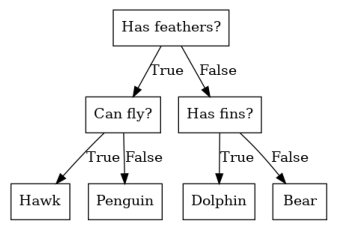

In [28]:
# Plot the example decision tree from the book
mglearn.plots.plot_animal_tree()

In [30]:
# Learning a decision tree means learning the optimal sequence of if/else questions that get us to the true answer.

# Decision trees (classifiers and regressors) in scikit-learn are in the DecisionTreeClassifier and DecisionTreeRegressor classes. These implement only pre-pruning, not post-pruning.

# Look at pre-pruning in the Breast Cancer dataset

from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=31)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

# Show accuracy:
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

# The score on the training set here is perfect because the default setting is to have pure leaves.

Accuracy on training set: 1.000
Accuracy on test set: 0.930


In [31]:
# Pre-prune the decision tree to only have a depth of 4
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

# Show accuracy:
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.979
Accuracy on test set: 0.944


In [32]:
# Scikit-learn has an option to export a visualization of the tree:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="figures/tree.dot", class_names=["malignant", "benign"], feature_names=cancer.feature_names, impurity=False, filled=True)

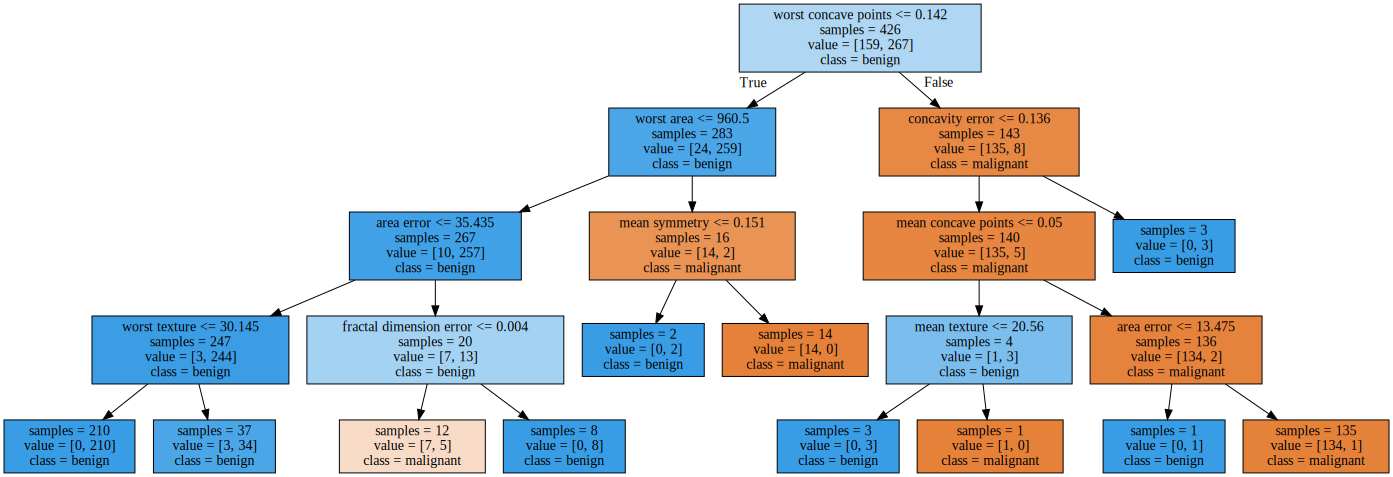

In [36]:
# Now read and visualize the saved .dot file
import graphviz

with open("figures/tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances:
[0.44127819 0.55872181]


ValueError: shape mismatch: objects cannot be broadcast to a single shape

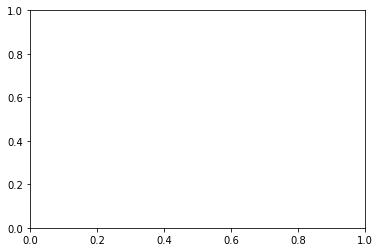

In [36]:
# Look at feature importances
print("Feature importances:\n{}".format(tree.feature_importances_))

# Visualize feature importances
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1] # number of columns
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


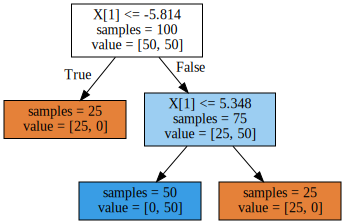

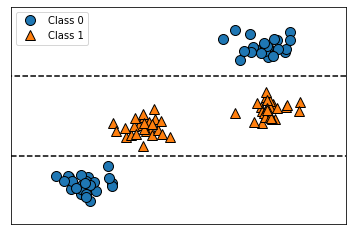

In [40]:
# Example of complicated relationship between features and class
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

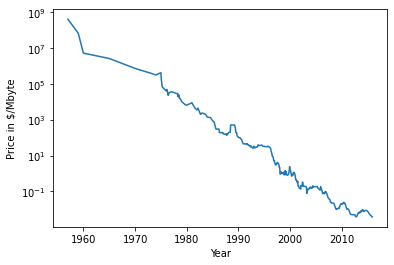

In [70]:
# Example of using a decision tree for regression
# Note: decision trees cannot be used to extrapolate, or make predictions outside of the range of the training data

# Load a dataset dealing with RAM prices
import pandas as pd
ram_prices = pd.read_csv("data/ram_price.csv")

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte");

/home/zieglers/Documents/python/ml_python_muller_guido/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/home/zieglers/Documents/python/ml_python_muller_guido/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  from ipykernel import kernelapp as app


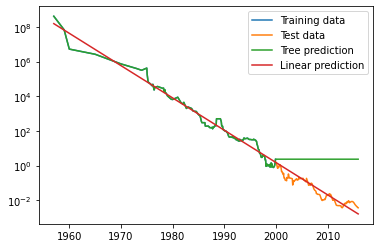

In [73]:
# Make predictions for the prices after 2000 using a decision tree regression and linear regression

from sklearn.tree import DecisionTreeRegressor

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

X_train = data_train.date[:, np.newaxis]
# use a log-transform
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# Undo log transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

# Compare predictions of decision tree vs linear regression
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend();


# Ensembles of Decision Trees

Ensembles are methods which combine multiple machine learning models. This portion talks about two such ensemble models with decision trees at their base: random forests and gradient boosted decision trees.

Random forests use multiple decision trees. While any individual tree is likely to overfit, averaging many trees which are slightly different will prevent overfitting.

n_estimators controls the number of trees in the forest

We begin by bootstrapping the data, drawing n_samples with replacement from the dataset
At each node in a particular tree, we don't look for the best test but randomly select a subset of features and look for the best test involving one of these features.

The bootstrapped dataset and random selection of features at each node ensure each tree in the forest is different.

After each tree has made a prediction, we can use the results to get a final prediction from the forest. For regression we can just average. For classfication we use "soft voting", where a probability is computed for each label, the probabilities are averaged, and the class with the highest probability is predicted.

In [29]:
# Analyze the two moons dataset with a random forest with five trees
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
print("Forest data type: {}".format(type(forest)))
forest.fit(X_train, y_train)

Forest data type: <class 'sklearn.ensemble._forest.RandomForestClassifier'>


RandomForestClassifier(n_estimators=5, random_state=2)

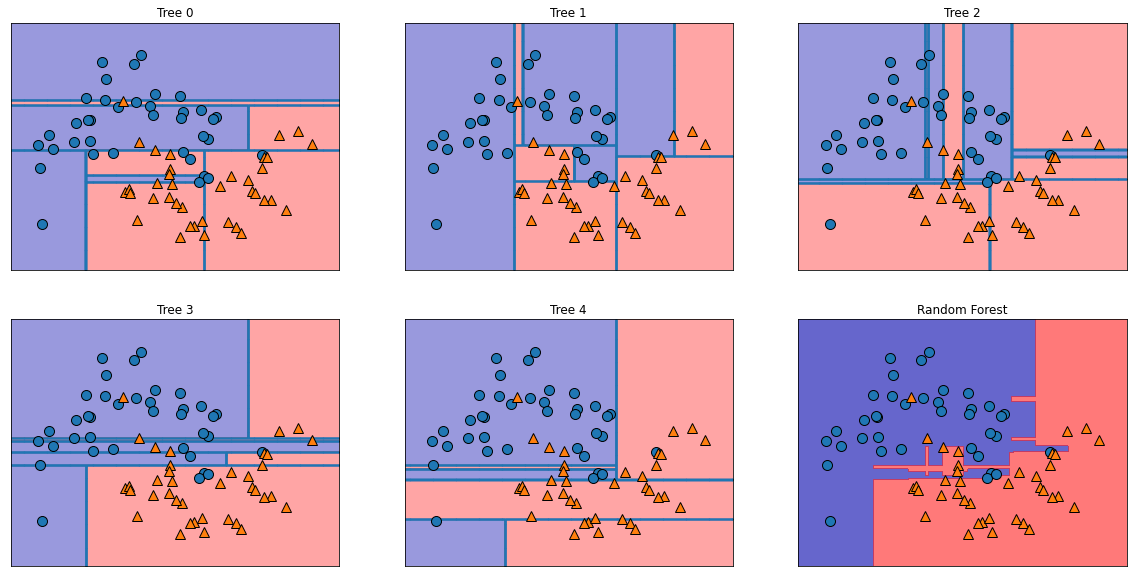

In [31]:
# Visualize each tree in the forest
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.6)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train); 

In [34]:
# Apply a random forest to the Breast Cancer dataset
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

# Compute scores
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


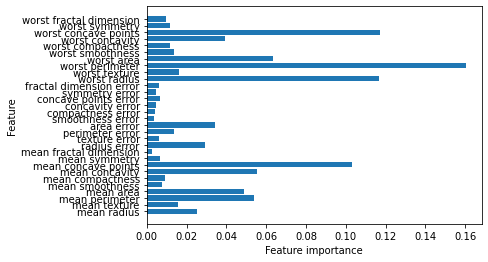

In [37]:
# Plot feature importances from the breast cancer data set for the random forest
# Visualize feature importances
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1] # number of columns
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
plot_feature_importances_cancer(forest)

Gradient boosted regression trees builds a sequence of trees that attempt to correct the mistakes of previous trees. 

There is no randomization here, but instead strong pre-pruning.

We combine many "weak learners", which here means shallow trees.

The learning rate parameter is added here, which in effect is a step size controlling the amount of change affecting each tree at each step.

In [38]:
# Test gradient boosted regression on the Breast cancer dataset
# The classifier defaults to 100 trees of max depth 3 with a learning rate of 0.1

from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.965


In [39]:
# Accuracy on the training set was 100%, suggesting over-fitting. We can reduce the max depth of each tree to 1 in an attempt to prevent this.

gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [40]:
# Lowering the learning rate may also help with overfitting
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


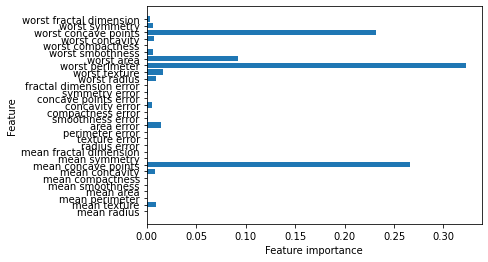

In [41]:
# Take a look at the feature importances for the gradient boosted regression
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
plot_feature_importances_cancer(gbrt)